In [2]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install matplotlib

     |████████████████████████████████| 9.4 MB 16.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 71.1 MB/s eta 0:00:01
     |████████████████████████████████| 295 kB 64.2 MB/s eta 0:00:01
     |████████████████████████████████| 965 kB 58.1 MB/s eta 0:00:01


In [2]:
import pandas as pd
from pandas import DataFrame

In [74]:
df = pd.read_csv('../data/train.csv')
df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


<AxesSubplot: >

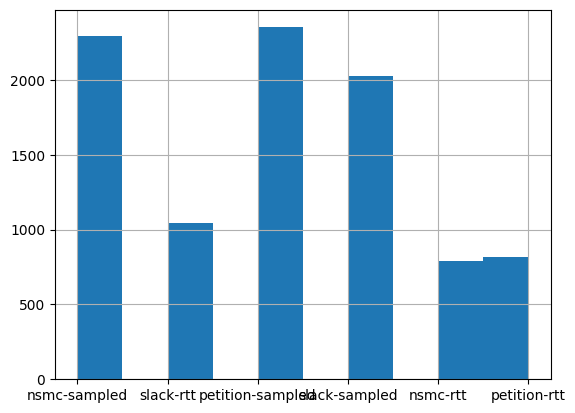

In [75]:
df['source'].hist()

In [110]:
# separate all the sentences and label
df1 = DataFrame(df.loc[:9323])
df2 = DataFrame(df.loc[9324:])
label = df1['label'][:9324]
binarylabel = df1['binary-label'][:9324]
id1 = df1['id'][:9324]
source = df1['source'][:9324]
sentence1 = df1['sentence_1']
sentence2 = df1['sentence_2']
sentence3 = df2['sentence_1']
sentence4 = df2['sentence_2']
# reset the index
sentence3 = sentence3.reset_index(drop = True)
sentence4 = sentence4.reset_index(drop = True)

In [111]:
# concat sentences 1,2 1,4 2,3 3,4 
df1 = pd.concat([id1, source, sentence1, sentence2, label, binarylabel], axis = 1)
df2 = pd.concat([id1, source, sentence1, sentence4, label, binarylabel], axis = 1)
df3 = pd.concat([id1, source, sentence2, sentence3, label, binarylabel], axis = 1)
df4 = pd.concat([id1, source, sentence3, sentence4, label, binarylabel], axis = 1)

df_combined = pd.concat([df1, df2, df3, df4]).reset_index(drop = True)
df_combined.to_csv('../data/train_augmented_times_4.csv', index=False)
df_combined.head()


,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [87]:

id1 = pd.Series(dtype=str, name = 'id')
df_combined = pd.concat([id1, df_combined])

In [97]:
df_combined.rename(columns={0:'id'}, inplace=True)
df_combined.to_csv('../data/train_augmented_times_4.csv', index = False)

<AxesSubplot: ylabel='Frequency'>

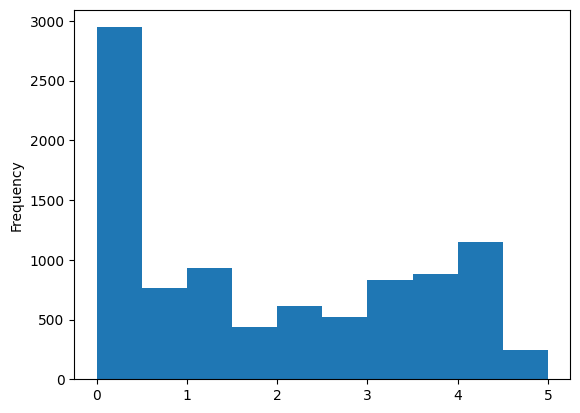

In [7]:
import matplotlib
df['label'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

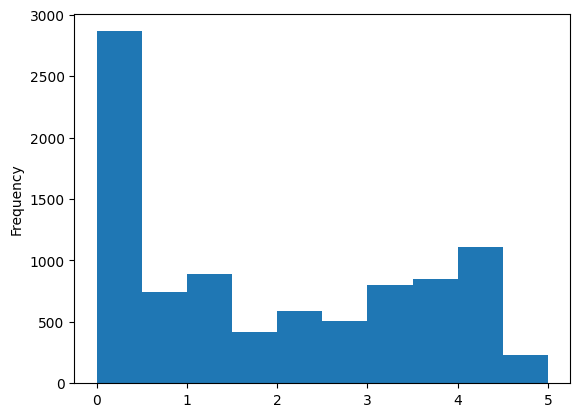

In [8]:
pagoda = pd.read_csv('../data/train_pagoda.csv')
pagoda['label'].plot.hist()

In [9]:
pagoda.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,짜릿하고 반전이 있어요. 다른 한국 영화 쓰레기와는 다르다.,"반전이 있고, 사랑이 있고, 재미가 있다.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,접속이 안된다고 뜨네요;;,"아, 접속이 안 된다고 하네요.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택 청약 조건을 변경해 주세요.,주택가입 및 무주택 기준을 변경해 주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사 후 처음 뵙게 되어 반가웠습니다.,너를 비디오로만 보고 실제로 보니 정말 좋았어.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,정말 자랑스러워요!,뽀뽀를 직접 만나봅시다.,0.0,0.0


### Label을 1,2,3,4,5로 줄여서 학습을 해보기

In [67]:
df = pd.read_csv('../data/train.csv')
df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [68]:
print(f'3.9 rounds to {round(3.9)}')
print(f'3.3 rounds to {round(3.3)}')
print(f'3.5 rounds to {round(3.5)}')

3.9 rounds to 4
3.3 rounds to 3
3.5 rounds to 4


In [69]:
df['label'].head()

0    2.2
1    4.2
2    2.4
3    3.0
4    0.0
Name: label, dtype: float64

In [70]:
df['label'] = df['label'].apply(round)
df['label'] = df['label'].apply(float)
df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.0,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.0,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.0,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [71]:
df.to_csv('../data/train_five_labels.csv', index = False)

<AxesSubplot: >

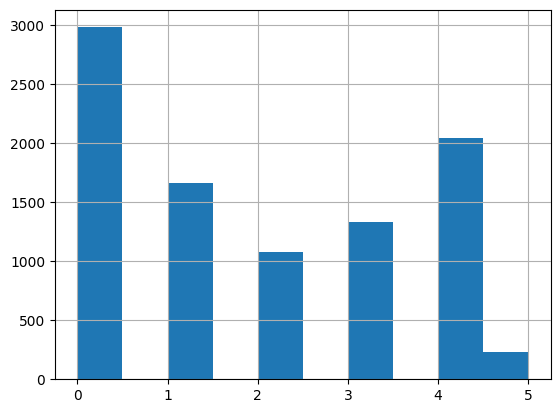

In [72]:
df['label'].hist()

In [73]:
sum(df['label'] == 1)

1658

In [80]:
import torch
model = torch.load('model.pt')``

AttributeError: Can't get attribute '__main__' on <module 'builtins' (built-in)>

In [87]:
torch.argmax(torch.tensor([0,1,3,4])).item

tensor(3)

In [93]:
import transformers
model = transformers.AutoModelForSequenceClassification.from_pretrained('beomi/KcELECTRA-base',num_labels=6)

Some weights of the model checkpoint at beomi/KcELECTRA-base were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.out_proj.weight', 'classifi

In [104]:
from transformers import pipeline
pipe = pipeline(task = "text-classification", model = model, tokenizer = transformers.AutoTokenizer.from_pretrained('beomi/KcELECTRA-base'))

ValueError: too many dimensions 'str'